# DirectLiNGAM with prior knowledge

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_prior_knowledge, make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.2.0']


## Utility function
We define a utility function to draw the directed acyclic graph.

In [2]:
def make_prior_knowledge_graph(prior_knowledge_matrix):
    d = graphviz.Digraph(engine='dot')
    
    labels = [f'x{i}' for i in range(prior_knowledge_matrix.shape[0])]
    for label in labels:
        d.node(label, label)

    dirs = np.where(prior_knowledge_matrix > 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to])

    dirs = np.where(prior_knowledge_matrix < 0)
    for to, from_ in zip(dirs[0], dirs[1]):
        d.edge(labels[from_], labels[to], style='dashed')
    return d

## Test data
We create test data consisting of 6 variables.

In [3]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X.head()

,x0,x1,x2,x3,x4,x5
0,2.394708,15.312359,3.685054,0.548814,15.780259,9.948090
1,2.325771,16.145216,4.332293,0.715189,14.335879,9.514409
2,2.197313,15.848718,4.539881,0.602763,14.027410,9.266158
3,1.672250,13.200354,3.675534,0.544883,10.421554,6.771233
4,1.282752,11.337503,3.486211,0.423655,7.533376,5.368668


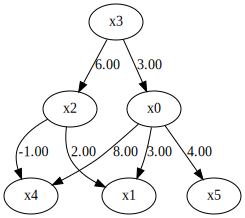

In [4]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

## Prior Knowledge
We create prior knowledge so that x0 is an exogenous variable.

[[ 0  0  0  0  0  0]
 [-1  0 -1 -1 -1 -1]
 [-1 -1  0 -1 -1 -1]
 [-1 -1 -1  0 -1 -1]
 [-1 -1 -1 -1  0 -1]
 [-1 -1 -1 -1 -1  0]]


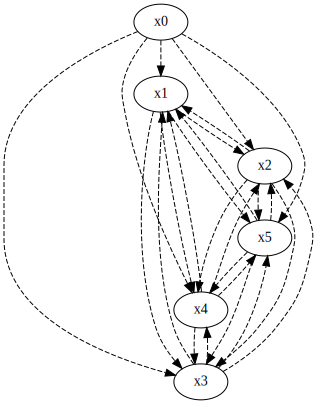

In [5]:
prior_knowledge = make_prior_knowledge(
    n_variables=6,
    exogenous_variables=[0])
print(prior_knowledge)
make_prior_knowledge_graph(prior_knowledge)

## Causal Discovery
To run causal discovery, we create a `DirectLiNGAM` object and call the `fit` method.

In [6]:
model = lingam.DirectLiNGAM(prior_knowledge=prior_knowledge)
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [7]:
model.causal_order_

[0, 5, 3, 2, 1, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [8]:
print(model.adjacency_matrix_)

[[ 0.     0.     0.     0.     0.     0.   ]
 [ 3.002  0.     1.996  0.     0.     0.   ]
 [ 0.     0.     0.     6.001  0.     0.   ]
 [ 0.299  0.     0.     0.     0.     0.   ]
 [ 7.978  0.    -0.988  0.     0.     0.   ]
 [ 3.998  0.     0.     0.     0.     0.   ]]


We can draw a causal graph by utility funciton.

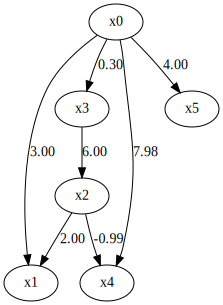

In [9]:
make_dot(model.adjacency_matrix_)